<a href="https://colab.research.google.com/github/Monikun123/B5_Data-Visualitasion-Desicion-Tree-Algoritm/blob/main/B5_Visualisasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving pressure_disease.csv to pressure_disease.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the updated dataset
file_path = 'pressure_disease.csv'
data = pd.read_csv(file_path)

<ipython-input-3-ff4f4871d8fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='BMI', data=data, palette='Set2')


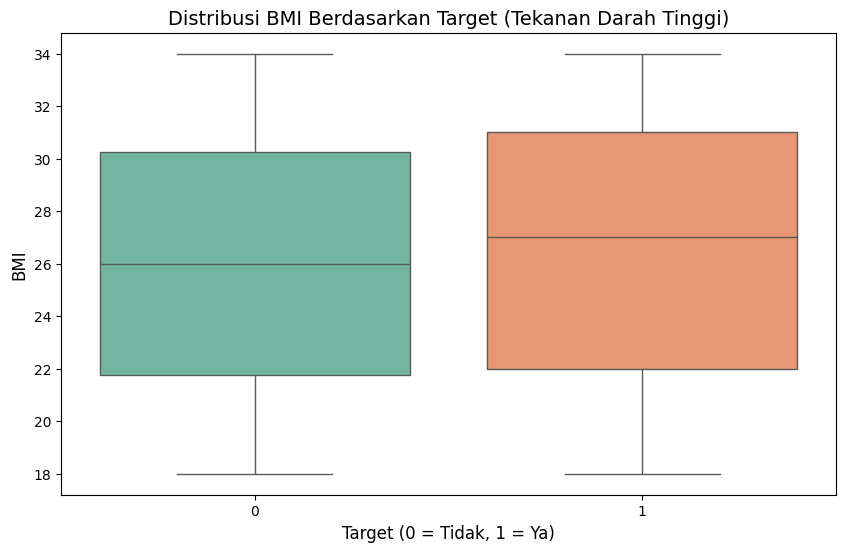

In [3]:
# Boxplot: BMI vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='BMI', data=data, palette='Set2')
plt.title('Distribusi BMI Berdasarkan Target (Tekanan Darah Tinggi)', fontsize=14)
plt.xlabel('Target (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

Akurasi Model Decision Tree: 38.33%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


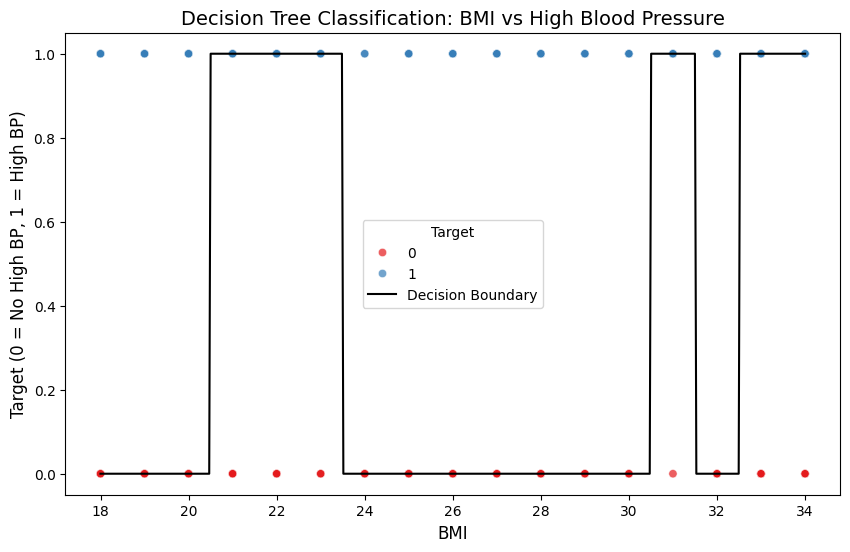

In [4]:
# Kode Desicion Tree
# Pisahkan data menjadi fitur (X) dan target (y)
X = data[['BMI']]  # Fitur (BMI)
y = data['Target']  # Target (Hipertensi)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree: {accuracy * 100:.2f}%")

# Visualisasi Scatterplot dengan Decision Boundary
# Buat grid untuk visualisasi boundary
bmi_values = np.linspace(data['BMI'].min(), data['BMI'].max(), 500).reshape(-1, 1)
predictions = model.predict(bmi_values)

plt.figure(figsize=(10, 6))

# Scatterplot untuk data asli
sns.scatterplot(x='BMI', y='Target', data=data, hue='Target', palette='Set1', alpha=0.7)

# Plot Decision Boundary
plt.plot(bmi_values, predictions, color='black', label='Decision Boundary')

# Tambahkan judul dan label
plt.title('Decision Tree Classification: BMI vs High Blood Pressure', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Target (0 = No High BP, 1 = High BP)', fontsize=12)
plt.legend(title='Target')
plt.show()